# Центральная предельная теорема своими руками

**Instructions**


В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

**Review criteria**

- Решение должно представлять собой IPython-ноутбук, содержащий:

- код, генерирующий выборки и графики;

- краткие описания каждого блока кода, объясняющие, что он делает;

- необходимые графики (убедитесь, что на них подписаны оси);

- выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;

- выводы по результатам выполнения задания.

----

In [2]:
import scipy.stats as sts
from matplotlib import pyplot as plt
import numpy as np

Подключаем все необходимые библиотеки.

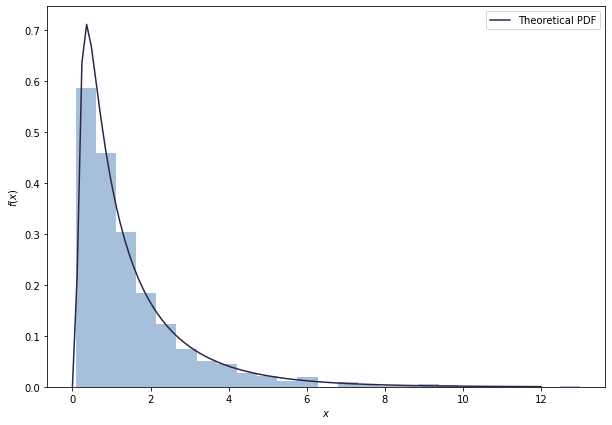

In [6]:
plt.figure(figsize=(10, 7))


fatigue_life = sts.fatiguelife(c=1) # Birnbaum–Saunders distribution ("Fatigue Life" distribution)
sample = fatigue_life.rvs(1000) # Generate sample from the distribution
plt.hist(sample, bins=25, density=True, alpha=0.9, color='#9DBAD7') # Plot sample histogram


x = np.linspace(0, 12, 100)
pdf = fatigue_life.pdf(x)
plt.plot(x, pdf, label='Theoretical PDF', alpha=1, color='#302447') # Plot PDF of the Fatigue Life distribution


plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

я выбрал распределение Бирнбаума-Сондерса. Формула: $f(x) = \left (\frac{\sqrt{\frac{x-\mu} {\beta}} + \sqrt{\frac{\beta}
{x-\mu}}} {2\gamma (x-\mu)} \right)
\phi \left( \frac{\sqrt{\frac{x-\mu} {\beta}} -
\sqrt{\frac{\beta} {x-\mu}}} {\gamma} \right)
\hspace{.2in}  x > \mu; \gamma, \beta > 0$ где параметр гамма γ = 1.
Далее построил гистограмму выборки из 1000 случайных значений. И построил поверх теоретическую плотность распределения. Как можно заметить, они достаточно хорошо ложатся друг на друга.

In [9]:
mean, variance = fatigue_life.stats(moments='mv') # Find mean and variance of the Fatigue Life distribution
print(f'Mean: {mean}; Variance: {variance}')
std_deviation = variance ** .5

Mean: 1.5; Variance: 2.25


Нашёл среднее значение и дисперсию моего распределения.

In [28]:
def approximate_distribution(sample_size: int):
    """
    Create an array with 1000 sample means.

    """
    return [np.mean(fatigue_life.rvs(sample_size)) for i in range(1000)]


def plot_approximated_distribution(sample_size, mean, variance) -> None:
    """
    Plot histograms of sample means distributions versus PDFs of normal distributions.

    """
    plt.figure(figsize=(7,5))

    sample_means = approximate_distribution(sample_size) # generate 1000 sample means of samples of size n
    plt.hist(sample_means, bins=20, density=True, alpha=0.9, color='#9DBAD7') # plot distribution of sample means

    normal_rv_mean = mean # calculate mean of normal distribution that will approximate dist. of sample means (according to formula)
    normal_variance = variance / sample_size # calculate variance of approximating normal distribution
    normal_std_deviation = normal_variance ** .5

    x = np.linspace(0, 4, 100)
    normal_rv = sts.norm(loc=normal_rv_mean, scale=normal_std_deviation)
    pdf = normal_rv.pdf(x)
    plt.plot(x, pdf, label='Normal Distribution PDF', alpha=1, color='#302447') # plot PDF of normal distribution

    plt.legend()
    plt.title(f'Sample size: {sample_size}')


    plt.show()

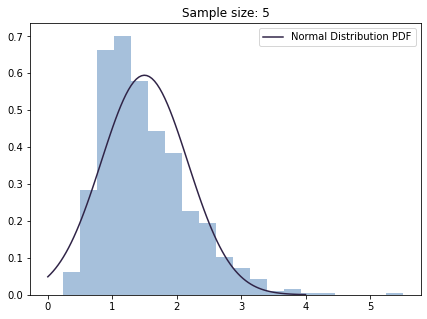

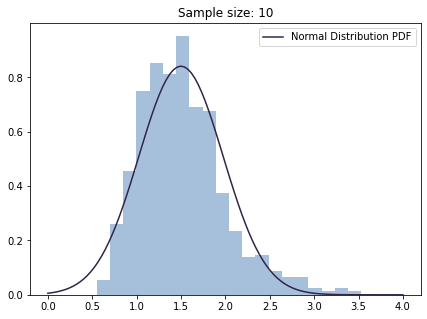

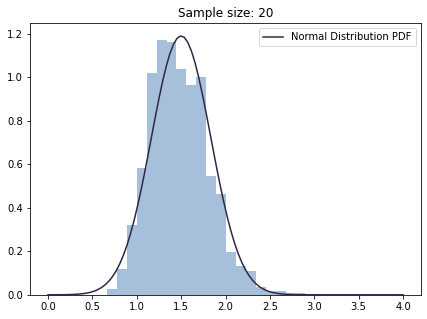

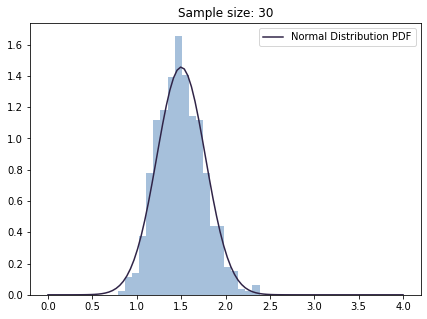

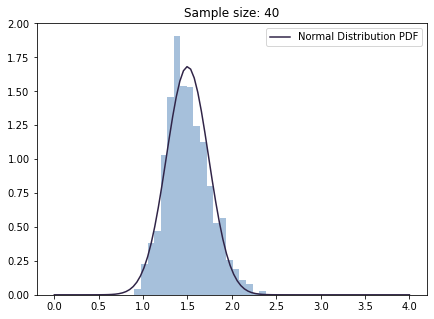

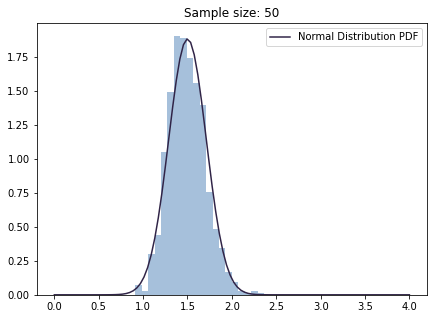

In [29]:
sample_sizes = np.array([5, 10, 20, 30, 40, 50]) # Размеры выборок
for n in sample_sizes:
    plot_approximated_distribution(sample_size=n, mean=mean, variance=variance)

Дальше сгенерировал 1000 выборок с объёмами `[5, 10, 20, 30, 40, 50]` и построил гистограммы распределений их выборочных средних. Поверх каждой гистограммы построил графики плотностей нормальных распределений ($N \sim (EX, DX / n)$ где $n$ - размер выборки), которыми приближаются распределения выборочных средних. Как можно увидеть, чем больше размер выборки, тем лучше приближается распределение выборочных средних.